# Predicción de Churn en Telecomunicaciones
### Proyecto de Machine Learning – CatBoost (AUC 0.903)

## Contexto del Proyecto

Interconnect, un operador de telecomunicaciones, desea predecir la probabilidad de churn para ofrecer planes promocionales a clientes en riesgo. El dataset incluye información contractual, datos personales, servicios de internet y telefonía. La columna customerID identifica a cada cliente, y la información es válida a partir de febrero 01 de 2020.

📂 **Archivos utilizados:**

```contract.csv```: información contractual

```personal.csv```: datos demográficos

```internet.csv```: servicios de internet

```phone.csv```: servicios telefónicos

🎯 **Objetivo:**
Crear un modelo que supere un AUC-ROC de 0.88 para predecir churn de forma fiable.

## Análisis exploratorio de datos
### Inicialización

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### Carga de datos

In [2]:
contract_data = pd.read_csv('datasets/final_provider/contract.csv')
personal_data = pd.read_csv('datasets/final_provider/personal.csv')
internet_data = pd.read_csv('datasets/final_provider/internet.csv')
phone_data = pd.read_csv('datasets/final_provider/phone.csv')

### Visualización de datos

**Información del contrato**

In [3]:
contract_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [4]:
contract_data.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [5]:
#Vefifiquemos duplicados 
print('Filas completamente duplicadas:', contract_data.duplicated().sum())
print('Usuarios duplicados:', contract_data['customerID'].duplicated().sum())

Filas completamente duplicadas: 0
Usuarios duplicados: 0


Inicialmente observamos que este para este dataframe las columnas de fecha de inicio y fin de contrato contienen la información en diferente formato, una incluye información horaria y la otra no. Tambien vemos que los valores para la columna 'TotalCharges' se encuentran en tipo object, muy probablemente en el futuro requeriremos que sean tipo float.

**Datos personales del cliente**

In [6]:
personal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [7]:
personal_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [8]:
#Vefifiquemos duplicados
print('Filas completamente duplicadas:', personal_data.duplicated().sum())
print('Usuarios duplicados:', personal_data['customerID'].duplicated().sum())

Filas completamente duplicadas: 0
Usuarios duplicados: 0


**Información sobre los servicios de Internet**

In [9]:
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [10]:
internet_data.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [11]:
#Vefifiquemos duplicados
print('Filas completamente duplicadas:', internet_data.duplicated().sum())
print('Usuarios duplicados:', internet_data['customerID'].duplicated().sum())

Filas completamente duplicadas: 0
Usuarios duplicados: 0


**Información sobre los servicios telefónicos**

In [12]:
phone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [13]:
phone_data.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [14]:
#Vefifiquemos duplicados
print('Filas completamente duplicadas:', phone_data.duplicated().sum())
print('Usuarios duplicados:', phone_data['customerID'].duplicated().sum())

Filas completamente duplicadas: 0
Usuarios duplicados: 0


### Corrección y enriquecimiento de datos

**Construcción del Target**\
En nuestro caso:
- EndDate = "No"  → Churn = 0
- EndDate ≠ "No" → Churn = 1

In [15]:
#Antes de empezar debemos crear nuestra columna objetivo
contract_data['Churn'] = (contract_data['EndDate'] != 'No').astype('int')
contract_data.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,1


**Conversión tipo de datos columna 'TotalCharges'**

In [16]:
#Debemos convertir nuestra columna 'TotalCharges' a float
contract_data['TotalCharges'] = pd.to_numeric(contract_data['TotalCharges'], errors='coerce')

#verificar nulos:
contract_data['TotalCharges'].isna().sum()

np.int64(11)

In [17]:
contract_data[contract_data['TotalCharges'].isna()]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,NaN,0
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,NaN,0
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,NaN,0
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,NaN,0
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,NaN,0
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,NaN,0
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,NaN,0
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,NaN,0
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,NaN,0


In [18]:
contract_data['BeginDate'].max()

'2020-02-01'

Vemos que los valores nulos que tenemos en la columna TotalCharges es debido a que son usuarios nuevos que aun no empiezan a pagar, esto lo corroboramos con la documentación. Ya que son pocos procederemos a eliminar estas filas.

**Merge de nuestras tablas**

In [19]:
#Ahora unamos nuestras tablas en una sola usando el customerID
data = contract_data.merge(personal_data, on='customerID', how='left').merge(internet_data, on='customerID', how='left').merge(phone_data, on='customerID', how='left')
print(data.head())
data.info()

   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

   Churn  gender  ...  Partner Dependents InternetService OnlineSecurity  \
0      0  Female  ...      Yes         No           

**Manejo valores nulos**

In [20]:
#eliminamos las filas con valores nulos en TotalCharges
data = data.dropna(subset=['TotalCharges']).reset_index(drop=True)
print(data['TotalCharges'].isna().sum())
data.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   BeginDate         7032 non-null   object 
 2   EndDate           7032 non-null   object 
 3   Type              7032 non-null   object 
 4   PaperlessBilling  7032 non-null   object 
 5   PaymentMethod     7032 non-null   object 
 6   MonthlyCharges    7032 non-null   float64
 7   TotalCharges      7032 non-null   float64
 8   Churn             7032 non-null   int64  
 9   gender            7032 non-null   object 
 10  SeniorCitizen     7032 non-null   int64  
 11  Partner           7032 non-null   object 
 12  Dependents        7032 non-null   object 
 13  InternetService   5512 non-null   object 
 14  OnlineSecurity    5512 non-null   object 
 15  OnlineBackup      5512 non-null   object 
 16  DeviceProtection  5512 non-null   object

Vemos que las tablas internet_data y phone_data, tienen menos valores de customerID, por ahora supondremos que los valores faltantes que en nuestra nueva tabla 'data' se muestran como nulos, se deben a que el usuario no presenta estos servicios, reemplazaremos los NaN por 'No service' y 'No'.

In [21]:
print(contract_data['customerID'].nunique())
print(internet_data['customerID'].nunique())
print(phone_data['customerID'].nunique())

7043
5517
6361


In [22]:
#confirmemos que los nulos se encuentran solo en columnas de servicios
data.isna().sum()

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1520
OnlineSecurity      1520
OnlineBackup        1520
DeviceProtection    1520
TechSupport         1520
StreamingTV         1520
StreamingMovies     1520
MultipleLines        680
dtype: int64

In [23]:
data['InternetService'] = data['InternetService'].fillna('No service')

cols_service_na = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
data[cols_service_na] = data[cols_service_na].fillna('No')

data['MultipleLines'] = data['MultipleLines'].fillna('No service')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   BeginDate         7032 non-null   object 
 2   EndDate           7032 non-null   object 
 3   Type              7032 non-null   object 
 4   PaperlessBilling  7032 non-null   object 
 5   PaymentMethod     7032 non-null   object 
 6   MonthlyCharges    7032 non-null   float64
 7   TotalCharges      7032 non-null   float64
 8   Churn             7032 non-null   int64  
 9   gender            7032 non-null   object 
 10  SeniorCitizen     7032 non-null   int64  
 11  Partner           7032 non-null   object 
 12  Dependents        7032 non-null   object 
 13  InternetService   7032 non-null   object 
 14  OnlineSecurity    7032 non-null   object 
 15  OnlineBackup      7032 non-null   object 
 16  DeviceProtection  7032 non-null   object 


In [24]:
data['OnlineBackup'].value_counts()

OnlineBackup
No     4607
Yes    2425
Name: count, dtype: int64

In [25]:
data.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Female,...,Yes,No,DSL,No,Yes,No,No,No,No,No service
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,0,Male,...,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,1,Male,...,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,DSL,Yes,No,Yes,Yes,No,No,No service
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,1,Female,...,No,No,Fiber optic,No,No,No,No,No,No,No


**Conversión tipo de datos en las columnas que contienen fechas**

In [26]:
#Cambiemos el tipo de datos de fechas y creemos una columna de tenure que nos dirá el tiempo del usuario en la empresa
data['BeginDate'] = pd.to_datetime(data['BeginDate'])
data['EndDate'] = pd.to_datetime(data['EndDate'], errors='coerce')

analysis_date = pd.to_datetime('2020-02-01')  # usa la fecha final del dataset

data['tenure'] = (data['EndDate'].fillna(analysis_date) - data['BeginDate']).dt.days / 30
data.head()

C:\Users\javie\AppData\Local\Temp\ipykernel_14448\3483949078.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['EndDate'] = pd.to_datetime(data['EndDate'], errors='coerce')


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,tenure
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,0,Female,...,No,DSL,No,Yes,No,No,No,No,No service,1.033333
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,0,Male,...,No,DSL,Yes,No,Yes,No,No,No,No,34.533333
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,Male,...,No,DSL,Yes,Yes,No,No,No,No,No,2.033333
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,DSL,Yes,No,Yes,Yes,No,No,No service,45.700000
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,Female,...,No,Fiber optic,No,No,No,No,No,No,No,2.033333


### Análisis de datos

**Información del contrato**

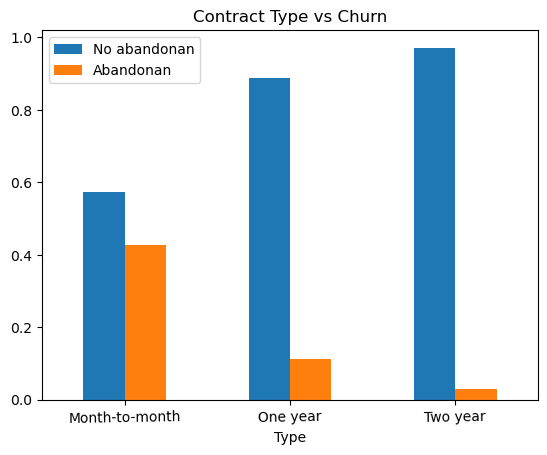

In [27]:
pd.crosstab(data['Type'], data['Churn'], normalize='index').plot(kind='bar', rot=1, title='Contract Type vs Churn')
plt.legend(['No abandonan', 'Abandonan'])
plt.show()

In [28]:
pd.crosstab(data['Type'], data['Churn'], normalize='index')

Churn,0,1
Type,,
Month-to-month,0.572903,0.427097
One year,0.887228,0.112772
Two year,0.971513,0.028487


In [29]:
data['Type'].value_counts()

Type
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

Vemos que para los tipos contrato, en general los contratos que presentan mayor porcentaje de abandono son los 'Month-to-month' con aproximadamente 42% de usuarios que han abandonado la empresa, sin embargo así mismo este es el contrato que presenta más usuarios 3875 de los cuales aproximadamente 1655 han abandono.

En contraste para los planes a largo plazo el porcentaje de usuarios que abandonan es mucho menor, al igual que la cantidad de usuarios que los eligen.

Sin embargo al ver la cantidad de usuarios que abandonan el plan mensual, los valores de usuarios activos se equilibran en los 3 contratos.

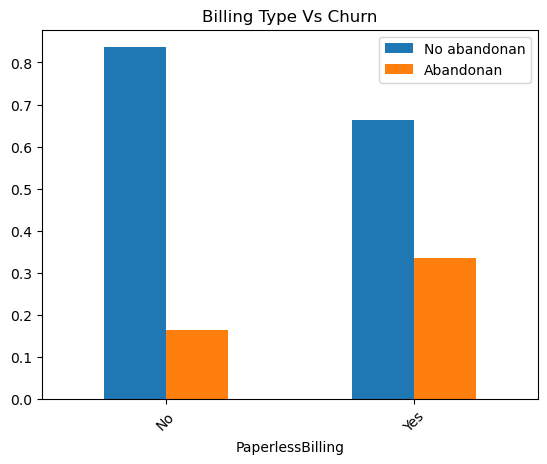

In [30]:
pd.crosstab(data['PaperlessBilling'], data['Churn'], normalize='index').plot(kind='bar', rot=45, title='Billing Type Vs Churn')
plt.legend(['No abandonan', 'Abandonan'])
plt.show()

In [31]:
pd.crosstab(data['PaperlessBilling'], data['Churn'], normalize='index')

Churn,0,1
PaperlessBilling,,
No,0.836243,0.163757
Yes,0.664107,0.335893


Vemos una ligera tendencia en que usuarios con factura electrónica tienden a tener un mayor porcentaje de abandono.

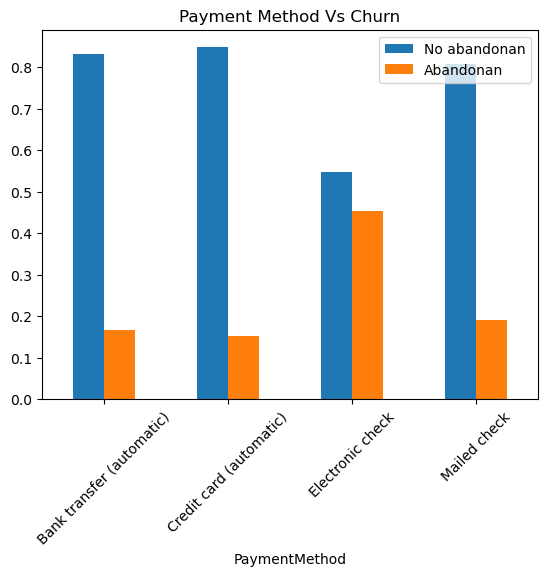

In [32]:
pd.crosstab(data['PaymentMethod'], data['Churn'], normalize='index').plot(kind='bar', rot=45, title='Payment Method Vs Churn')
plt.legend(['No abandonan', 'Abandonan'])
plt.show()

In [33]:
pd.crosstab(data['PaymentMethod'], data['Churn'], normalize='index')

Churn,0,1
PaymentMethod,,
Bank transfer (automatic),0.832685,0.167315
Credit card (automatic),0.847469,0.152531
Electronic check,0.547146,0.452854
Mailed check,0.807980,0.192020


In [34]:
data['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64

In [35]:
pd.crosstab(data['PaymentMethod'], data['Type'], normalize='index')

Type,Month-to-month,One year,Two year
PaymentMethod,,,
Bank transfer (automatic),0.381971,0.253567,0.364462
Credit card (automatic),0.357002,0.261670,0.381328
Electronic check,0.782241,0.146723,0.071036
Mailed check,0.556733,0.209476,0.233791


In [36]:
pd.crosstab([data['Type'], data['PaymentMethod']],
            data['Churn'],
            normalize='index')

Churn                                            0         1
Type           PaymentMethod                                
Month-to-month Bank transfer (automatic)  0.658744  0.341256
               Credit card (automatic)    0.672192  0.327808
               Electronic check           0.462703  0.537297
               Mailed check               0.684211  0.315789
One year       Bank transfer (automatic)  0.902813  0.097187
               Credit card (automatic)    0.896985  0.103015
               Electronic check           0.815562  0.184438
               Mailed check               0.931548  0.068452
Two year       Bank transfer (automatic)  0.966192  0.033808
               Credit card (automatic)    0.977586  0.022414
               Electronic check           0.922619  0.077381
               Mailed check               0.992000  0.008000

Alrededor de un 45% de lo usuarios que pagan a travez de Electronic check abandonan a la compañía, presentando la más alta taza de abandono a la vez 
que la mayor cantidad de usuarios por medio de pago, además vemos que de los usuarios que utilizan este método el 78% tiene un contrato mensual. Podriamos tener una correlación entre estas y la taza de abandono.

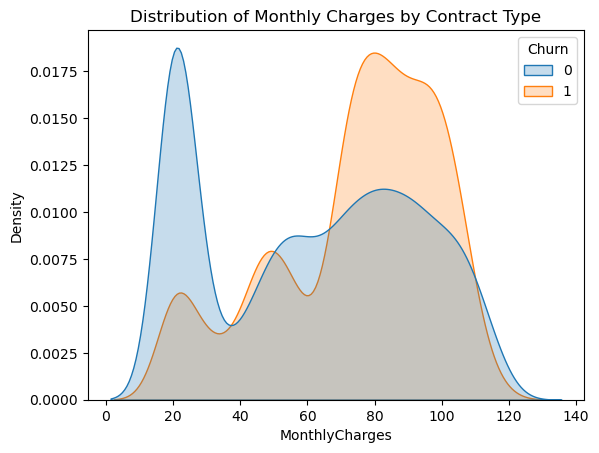

In [37]:
sns.kdeplot(data=data,
            x='MonthlyCharges',
            hue='Churn',
            fill=True,
            common_norm=False)

plt.title('Distribution of Monthly Charges by Contract Type')
plt.show()

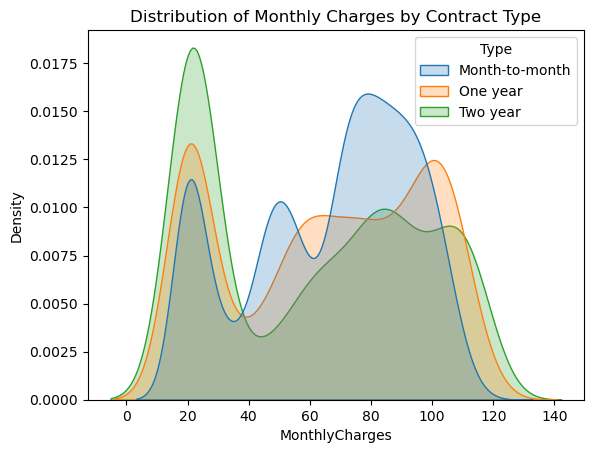

In [38]:
sns.kdeplot(data=data,
            x='MonthlyCharges',
            hue='Type',
            fill=True,
            common_norm=False)

plt.title('Distribution of Monthly Charges by Contract Type')
plt.show()

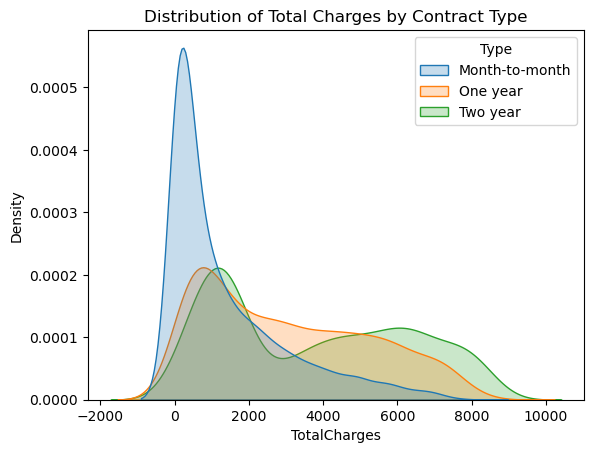

In [39]:
sns.kdeplot(data=data,
            x='TotalCharges',
            hue='Type',
            fill=True,
            common_norm=False)

plt.title('Distribution of Total Charges by Contract Type')
plt.show()

Vemos que ademas para el contrato mensual, pueden haber cargos mensuales altos para una amplia cantidad de usuarios sin embargo cuando observamos los cargos totales vemos que la mayoria presenta cargos bajos, podria deberse a que estos usuarios abandonan rápidamente sus contratos con la compañia.

**Información Personal**

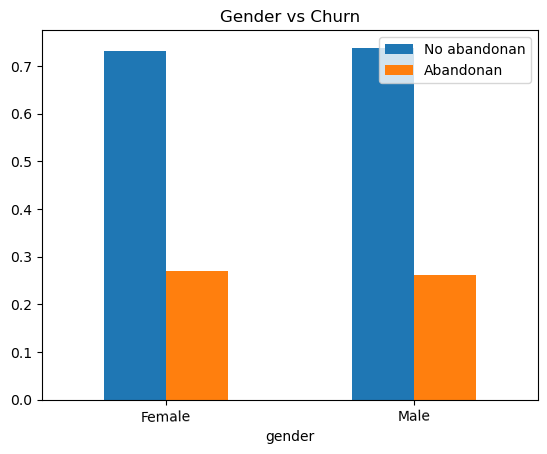

In [40]:
pd.crosstab(data['gender'], data['Churn'], normalize='index').plot(kind='bar', rot=1, title='Gender vs Churn')
plt.legend(['No abandonan', 'Abandonan'])
plt.show()

In [41]:
data['gender'].value_counts()

gender
Male      3549
Female    3483
Name: count, dtype: int64

In [42]:
pd.crosstab(data['gender'], data['Churn'], normalize='index')

Churn,0,1
gender,,
Female,0.730405,0.269595
Male,0.737954,0.262046


Parece no tener influencia directa el genero del usuario con la taza de abandono.

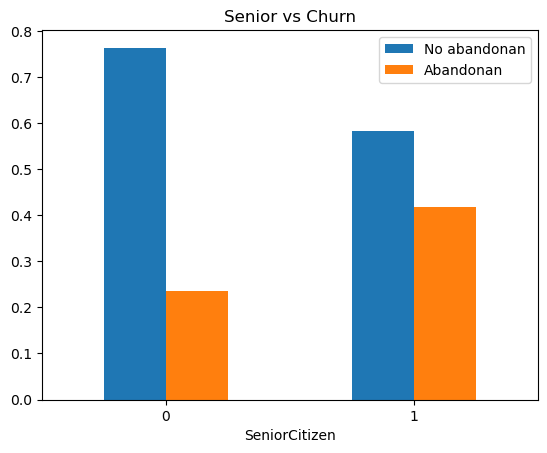

In [43]:
pd.crosstab(data['SeniorCitizen'], data['Churn'], normalize='index').plot(kind='bar', rot=1, title='Senior vs Churn')
plt.legend(['No abandonan', 'Abandonan'])
plt.show()

In [44]:
data['SeniorCitizen'].value_counts()

SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

In [45]:
pd.crosstab(data['SeniorCitizen'], data['Churn'], normalize='index')

Churn,0,1
SeniorCitizen,,
0,0.763497,0.236503
1,0.583187,0.416813


In [46]:
pd.crosstab(data['SeniorCitizen'], data['Type'], normalize='index')

Type,Month-to-month,One year,Two year
SeniorCitizen,,,
0,0.520883,0.217657,0.26146
1,0.706655,0.166375,0.12697


In [47]:
pd.crosstab(data['SeniorCitizen'], data['PaymentMethod'], normalize='index')

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
SeniorCitizen,,,,
0,0.222241,0.220713,0.300679,0.256367
1,0.204028,0.193520,0.520140,0.082312


Sin embargo las personas mayores presentan un porcentaje de abandono de 41% aproximadamente. Tengamos en cuenta que ademas el 70% de los usuarios Senior tienen contrato Month-to-month y el 52% utilizan como método de pago Electronic check. Basados en la información que hemos visto podríamos entender que estos usuarios presentan mayor riesgo de abandono.

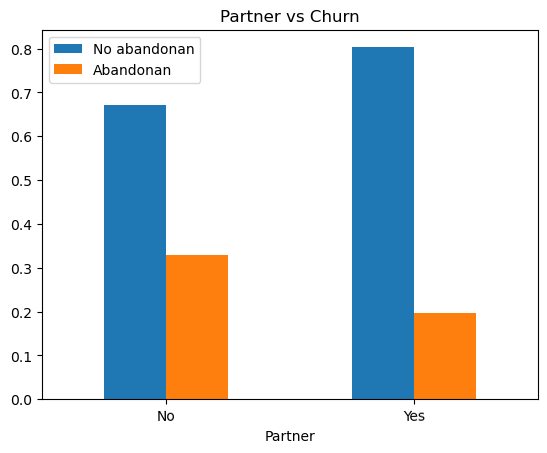

In [48]:
pd.crosstab(data['Partner'], data['Churn'], normalize='index').plot(kind='bar', rot=1, title='Partner vs Churn')
plt.legend(['No abandonan', 'Abandonan'])
plt.show()

In [49]:
data['Partner'].value_counts()

Partner
No     3639
Yes    3393
Name: count, dtype: int64

In [50]:
pd.crosstab(data['Partner'], data['Churn'], normalize='index')

Churn,0,1
Partner,,
No,0.670239,0.329761
Yes,0.802829,0.197171


Hay un porcentaje más alto de abandono de usuarios No Partner, presentan un 32% aproximadamente.

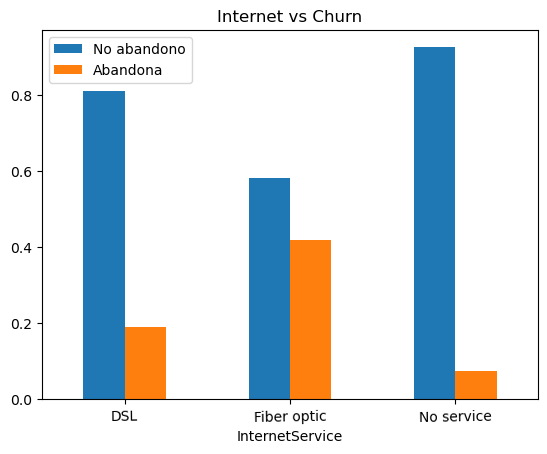

In [51]:
#Abandono por tipo de internet
pd.crosstab(data['InternetService'], data['Churn'], normalize='index').plot(kind='bar', rot=1, title='Internet vs Churn')
plt.legend(['No abandono', 'Abandona'])
plt.show()

In [52]:
data['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2416
No service     1520
Name: count, dtype: int64

In [53]:
pd.crosstab(data['InternetService'], data['Churn'], normalize='index')

Churn,0,1
InternetService,,
DSL,0.810017,0.189983
Fiber optic,0.581072,0.418928
No service,0.925658,0.074342


In [54]:
pd.crosstab(data['InternetService'], data['Type'], normalize='index')

Type,Month-to-month,One year,Two year
InternetService,,,
DSL,0.506209,0.235927,0.257864
Fiber optic,0.687339,0.174096,0.138566
No service,0.344737,0.238816,0.416447


Tenemos un alto porcentaje de usuarios de Fibra optica que cancelan su plan con un 41% y sumado a esto el 68% de los usuarios de fibra optica poseen un plan mensual, vemos tambien una tendencia a riesgo de perdida de clientes en este caso.

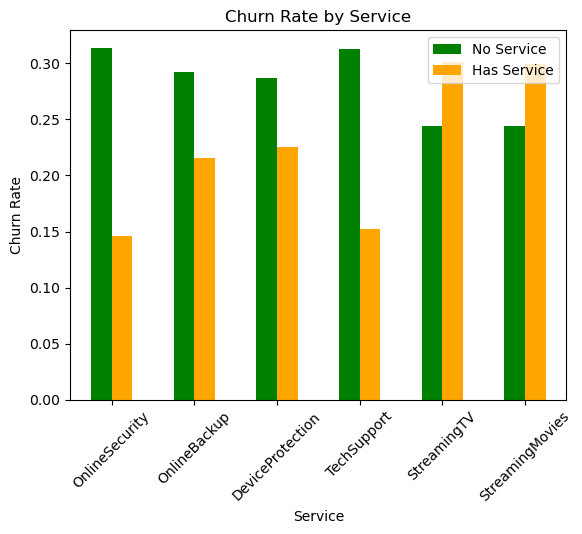

In [55]:
#Veamos el abandono en otros servicios:
service_cols = [
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

rows = []

for col in service_cols:
    ct = pd.crosstab(data[col], data['Churn'], normalize='index')
    rows.append({
        'Service': col,
        'No Service': ct.loc['No', 1] if 'No' in ct.index else 0,
        'Has Service': ct.loc['Yes', 1] if 'Yes' in ct.index else 0
    })

churn_services = pd.DataFrame(rows)

churn_services.set_index('Service').plot(kind='bar', color=['green', 'orange'])

plt.title('Churn Rate by Service')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()


In [56]:
churn_services.set_index('Service')

,No Service,Has Service
Service,,
OnlineSecurity,0.313733,0.146402
OnlineBackup,0.292164,0.215670
DeviceProtection,0.286953,0.225393
TechSupport,0.312300,0.151961
StreamingTV,0.243705,0.301147
StreamingMovies,0.244362,0.299524


Las gráficas anteriores muestran, la tasa de abandono de usuarios si tienen o no tienen los servicios mencionados. Vemos así que para los usuarios con servicios de streaming presentan una tasa de abandono más alta que los usuarios que to poseen este servicio.

Sucede lo contrario con los demás servicios, donde los usuarios que no poseen dichos servicios presentan mayor tasa de abandono, especialmente marcado para los servicios de 'OnlineSecurity' y 'TechSupport'.

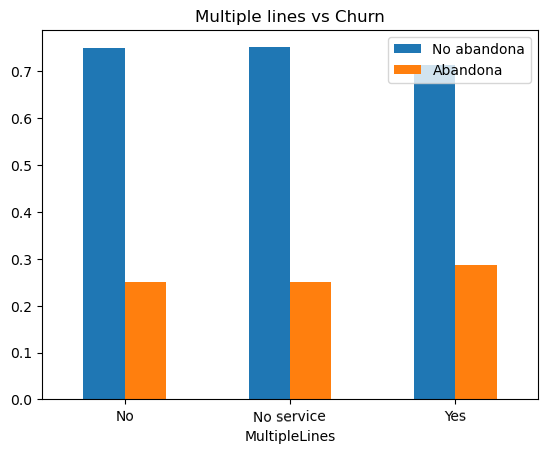

In [57]:
#Veamos ahora que muestran los datos de los usuarios con múltiples lineas
pd.crosstab(data['MultipleLines'], data['Churn'], normalize='index').plot(kind='bar', rot=1, title='Multiple lines vs Churn')
plt.legend(['No abandona', 'Abandona'])
plt.show()

In [58]:
data['MultipleLines'].value_counts()

MultipleLines
No            3385
Yes           2967
No service     680
Name: count, dtype: int64

In [59]:
pd.crosstab(data['MultipleLines'], data['Churn'], normalize='index')

Churn,0,1
MultipleLines,,
No,0.749188,0.250812
No service,0.750000,0.250000
Yes,0.713515,0.286485


Vemos que no hay tendencia directa de abandono para los usuarios que tienen o no más de una linea.

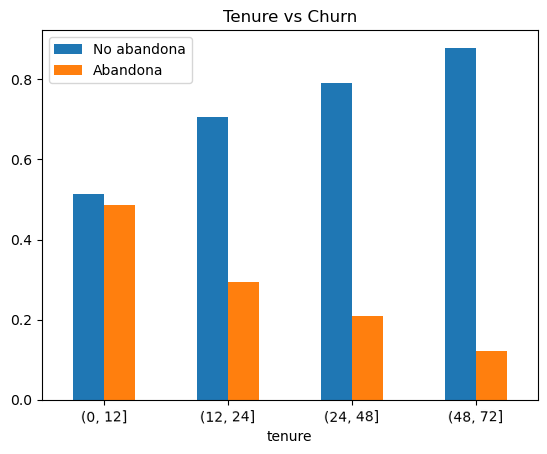

In [60]:
#Veamos como se relaciona el tenure con el abandono
pd.crosstab(pd.cut(data['tenure'], bins=[0,12,24,48,72]), data['Churn'], normalize='index').plot(kind='bar', rot=1, title='Tenure vs Churn')
plt.legend(['No abandona', 'Abandona'])
plt.show()

In [61]:
pd.crosstab(pd.cut(data['tenure'], bins=[0,12,24,48,72]),
            data['Churn'],
            normalize='index')

Churn,0,1
tenure,,
"(0, 12]",0.514577,0.485423
"(12, 24]",0.704871,0.295129
"(24, 48]",0.791256,0.208744
"(48, 72]",0.878941,0.121059


In [62]:
pd.crosstab(pd.cut(data['tenure'], bins=[0,12,24,48,72]),
            data['Type'],
            normalize='index')

Type,Month-to-month,One year,Two year
tenure,,,
"(0, 12]",0.927114,0.049077,0.023810
"(12, 24]",0.730659,0.190067,0.079274
"(24, 48]",0.520320,0.314039,0.165640
"(48, 72]",0.197635,0.347410,0.454955


Como podiamos intuir de lo que hemos visto anteriormente los usuarios que abandonan tienden a hacerlo rápidamente, es decir en contratos nuevos o con poco tiempo presentanto un 48% de abandono en los primeros 12 meses de contrato, esto claramente se asocia tambien al alto abandono en contratos Month-to-month.

## Conclusiones del EDA

Los datos nos muestran que hay factores que influyen más claramente en la tasa de abandono de los usuarios. Vemos especialmente que el tipo de contrato elegido por los usuarios, el método de pago favorito y el tenure influyen directamente en el abandono de usuarios. Sumados a estos si combinamos características y estilos de vida de los usuarios como usuarios Senior vemos riesgos más altos de abandono. 

Así mismo usuarios con servicio de internet de fibra optica son más propensos al abandono y si a estos agregamos características como las mencionadas anteriormente, tambien presentan alto riesgo de abandono. Finalmente la no tenencia de servicio de soporte tecnico y/o OnlineSecurity influyen altamente en el abandono por parte de los usuarios. Vale la pena además mencionar que hay un mayor abandono de usuarios con servicio de streaming de aquellos que no lo tienen.

---
# Etapa 2
## Modelos


In [115]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

## Verificación de características
Vamos a eliminar las columnas BeginDate	y EndDate, de estas ya hemos obtenido la característica 'tenure' y el objetivo 'Churn', por tanto podemos eliminarlas ya que no aportaran a nuestro modelo.

In [64]:
data = data.drop(['BeginDate', 'EndDate'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Type              7032 non-null   object 
 2   PaperlessBilling  7032 non-null   object 
 3   PaymentMethod     7032 non-null   object 
 4   MonthlyCharges    7032 non-null   float64
 5   TotalCharges      7032 non-null   float64
 6   Churn             7032 non-null   int64  
 7   gender            7032 non-null   object 
 8   SeniorCitizen     7032 non-null   int64  
 9   Partner           7032 non-null   object 
 10  Dependents        7032 non-null   object 
 11  InternetService   7032 non-null   object 
 12  OnlineSecurity    7032 non-null   object 
 13  OnlineBackup      7032 non-null   object 
 14  DeviceProtection  7032 non-null   object 
 15  TechSupport       7032 non-null   object 
 16  StreamingTV       7032 non-null   object 


In [65]:
data.head()

,customerID,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,tenure
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,29.85,0,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No service,1.033333
1,5575-GNVDE,One year,No,Mailed check,56.95,1889.50,0,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,34.533333
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,108.15,1,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,2.033333
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1840.75,0,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No service,45.700000
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,151.65,1,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,2.033333


### Division de características

In [66]:
features = data.drop(['customerID', 'Churn'], axis=1)
target = data['Churn']

In [67]:
features_temp, features_test, target_temp, target_test = train_test_split(features, target, test_size=0.15, random_state=42)
features_train, features_valid, target_train, target_valid = train_test_split(features_temp, target_temp, test_size=0.176, random_state=42)

### Preparación de datos y codificación

In [68]:
num_features = ['MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'tenure']
cat_features = [col for col in features.columns if col not in num_features]
print(num_features)
print(cat_features)

['MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'tenure']
['Type', 'PaperlessBilling', 'PaymentMethod', 'gender', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']


In [69]:
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))])

In [70]:
tree_preprocessor = ColumnTransformer(
    transformers=[('num', 'passthrough', num_features),
                  ('cat', cat_transformer, cat_features)])
logistic_preprocessor = ColumnTransformer(
    transformers=[('num', num_transformer, num_features),
                  ('cat', cat_transformer, cat_features)])

In [71]:
tree_pipeline = Pipeline(steps=[
    ('preprocessor', tree_preprocessor),
    ('model', DecisionTreeClassifier(max_depth=8, random_state=42))
])
rndfst_pipeline = Pipeline(steps=[
    ('preprocessor', tree_preprocessor),
    ('model', RandomForestClassifier(n_estimators=500, max_depth=8, random_state=42))
])
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', logistic_preprocessor),
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

### Prueba de cordura

In [72]:
dummy_pipeline = Pipeline(steps=[
    ('preprocessor', logistic_preprocessor),
    ('model', DummyClassifier(strategy='most_frequent'))
])

dummy_pipeline.fit(features_train, target_train)

valid_prob = dummy_pipeline.predict_proba(features_valid)[:,1]
print('Dummy AUC:', roc_auc_score(target_valid, valid_prob))

Dummy AUC: 0.5


In [73]:
#Veamos si hay data leakage
random_target = np.random.permutation(target_train)

sanity_pipeline = Pipeline(steps=[
    ('preprocessor', logistic_preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

sanity_pipeline.fit(features_train, random_target)

random_valid_prob = sanity_pipeline.predict_proba(features_valid)[:,1]
print('Sanity AUC:', roc_auc_score(target_valid, random_valid_prob))

Sanity AUC: 0.41206594578129757


Obtenemos resultados consistentes para prueba de cordura así mismo nuestra prueba utilizando etiquetas aleatorias muestra que no hay filtración de información.

### Entrenamiento de modelos


In [74]:
#Funciones que crean las curvas ROC y PR
def plot_roc_curve(target_valid, probabilities_valid):
    probabilities_one_valid = probabilities_valid[:,1]
    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
    auc = roc_auc_score(target_valid, probabilities_one_valid)
    
    plt.figure()
    plt.plot(fpr, tpr, label=f'AUC= {auc:.3f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('Tasa de falsos positivos')
    plt.ylabel('Tasa de verdaderos positivos')
    plt.legend()
    plt.title('Curva ROC')
    plt.show()

def plot_pr_curve(target_valid, probabilities_valid):
    probabilities_one_valid = probabilities_valid[:,1]
    precision, recall, thresholds = precision_recall_curve(
    target_valid, probabilities_one_valid)
    
    ap = average_precision_score(target_valid, probabilities_one_valid)
    
    plt.figure()
    plt.step(recall, precision, where='post', label=f'AP= {ap:.3f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.legend()
    plt.title('Precision-Recall Curve')
    plt.show()

**Regresión logística**

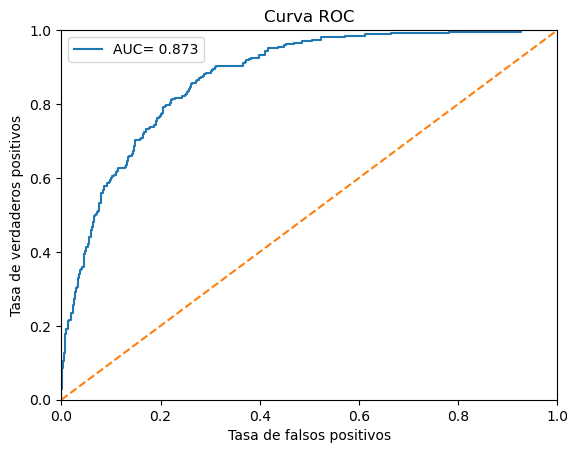

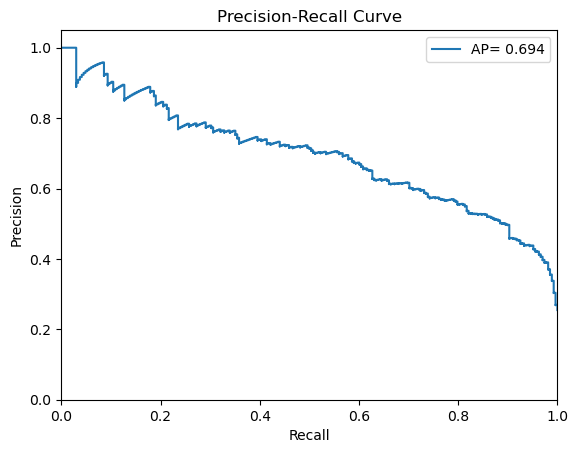

Accuracy: 0.7652091254752852


In [75]:
logreg_pipeline.fit(features_train, target_train)
logreg_valid_prob = logreg_pipeline.predict_proba(features_valid)

plot_roc_curve(target_valid, logreg_valid_prob)
plot_pr_curve(target_valid, logreg_valid_prob)

print('Accuracy:', accuracy_score(target_valid, logreg_pipeline.predict(features_valid)))

**Árbol de decisión**

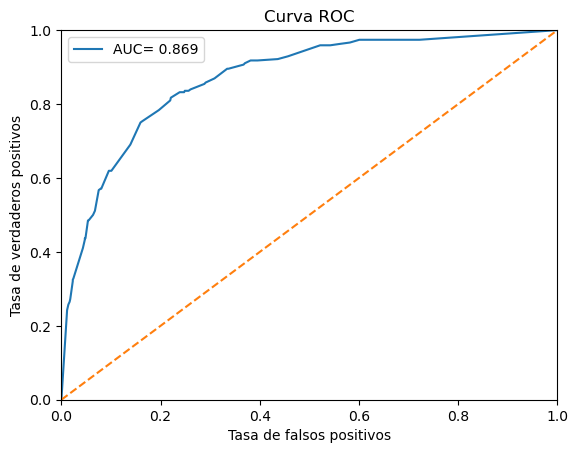

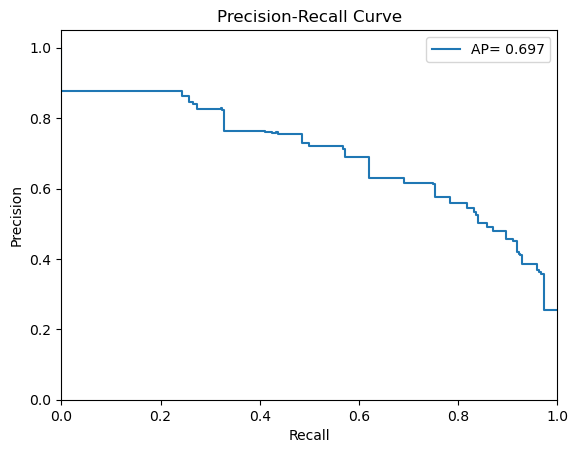

Accuracy: 0.8317490494296578


In [76]:
tree_pipeline.fit(features_train, target_train)
tree_valid_prob = tree_pipeline.predict_proba(features_valid)

plot_roc_curve(target_valid, tree_valid_prob)
plot_pr_curve(target_valid, tree_valid_prob)

print('Accuracy:', accuracy_score(target_valid, tree_pipeline.predict(features_valid)))

**Bosque Aleatorio**

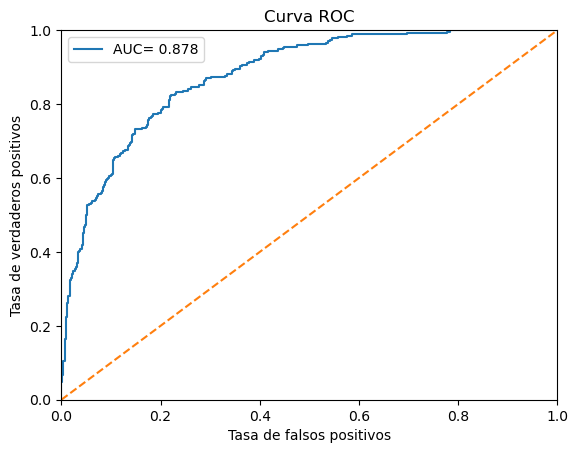

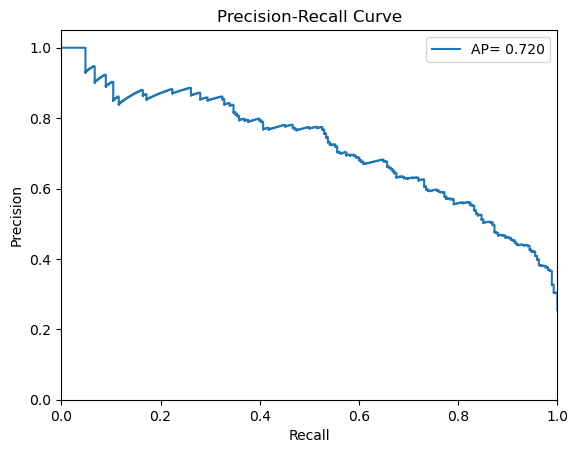

Accuracy: 0.8317490494296578


In [77]:
rndfst_pipeline.fit(features_train, target_train)
rndfst_valid_prob = rndfst_pipeline.predict_proba(features_valid)

plot_roc_curve(target_valid, rndfst_valid_prob)
plot_pr_curve(target_valid, rndfst_valid_prob)

print('Accuracy:', accuracy_score(target_valid, rndfst_pipeline.predict(features_valid)))

**LGBMClassifier**

In [78]:
#Copiemos primero las características antes de cambiar su tipo a 'category'
lgbm_features_train = features_train.copy()
lgbm_features_valid = features_valid.copy()
lgbm_features_test = features_test.copy()

In [79]:
#Convertir columnas categóricas
for col in cat_features:
    lgbm_features_train[col] = lgbm_features_train[col].astype('category')
    lgbm_features_valid[col] = lgbm_features_valid[col].astype('category')
    lgbm_features_test[col] = lgbm_features_test[col].astype('category')

[LightGBM] [Info] Number of positive: 1317, number of negative: 3608
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 698
[LightGBM] [Info] Number of data points in the train set: 4925, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


C:\Users\javie\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\javie\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\javie\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\javie\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^

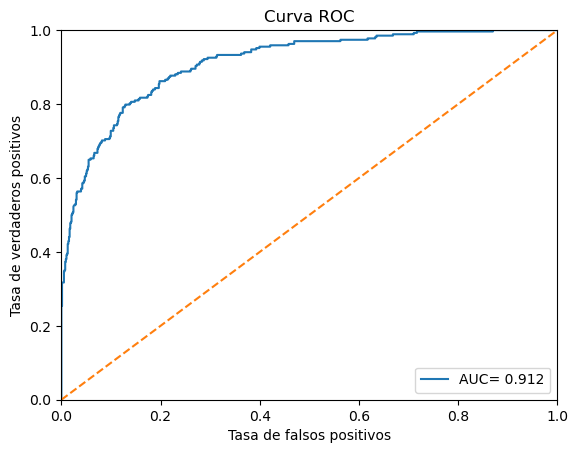

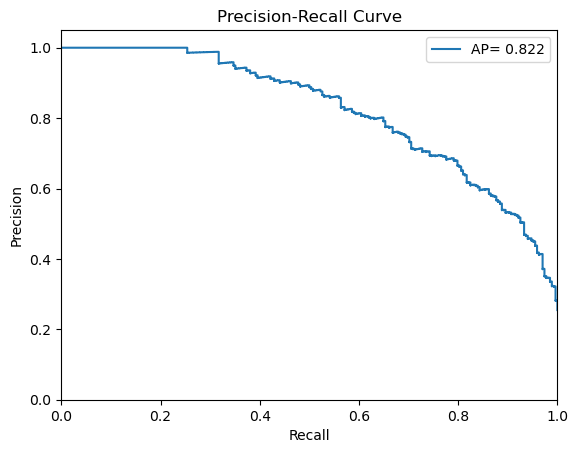

Accuracy: 0.8536121673003803


In [80]:
#Creación y entrenamiento de modelo
lgbm_model = LGBMClassifier(n_estimators=500, learning_rate=0.05, class_weight='balanced', random_state=42)

lgbm_model.fit(lgbm_features_train, target_train, categorical_feature=cat_features)
lgbm_valid_prob = lgbm_model.predict_proba(lgbm_features_valid)

plot_roc_curve(target_valid, lgbm_valid_prob)
plot_pr_curve(target_valid, lgbm_valid_prob)

print('Accuracy:', accuracy_score(target_valid, lgbm_model.predict(lgbm_features_valid)))

**CatBoost**

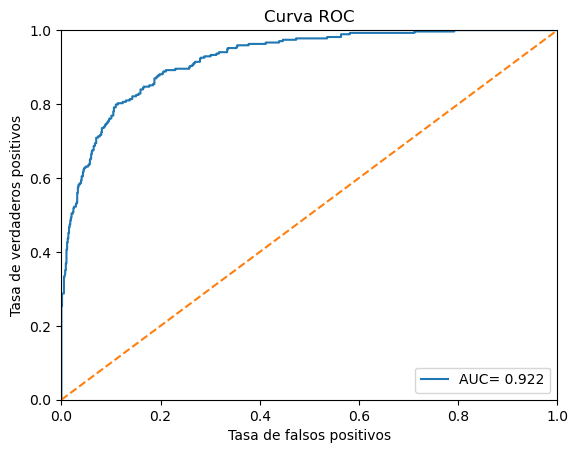

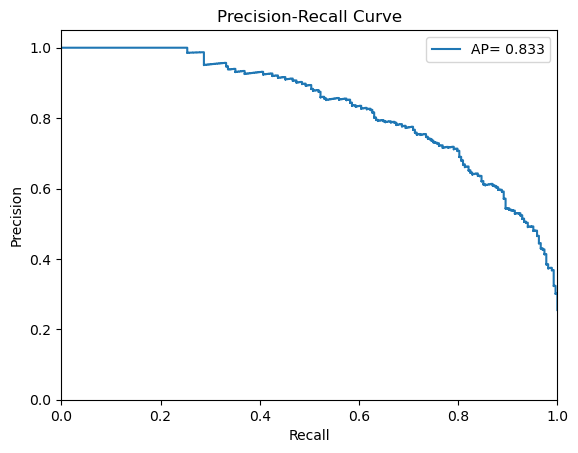

Accuracy: 0.8678707224334601


In [81]:
cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    eval_metric='AUC',
    random_seed=42,
    verbose=False
)

cat_model.fit(features_train, target_train, cat_features=cat_features)
cat_valid_prob = cat_model.predict_proba(features_valid)

plot_roc_curve(target_valid, cat_valid_prob)
plot_pr_curve(target_valid, cat_valid_prob)

print('Accuracy:', accuracy_score(target_valid, cat_model.predict(features_valid)))

### Comparación de modelos

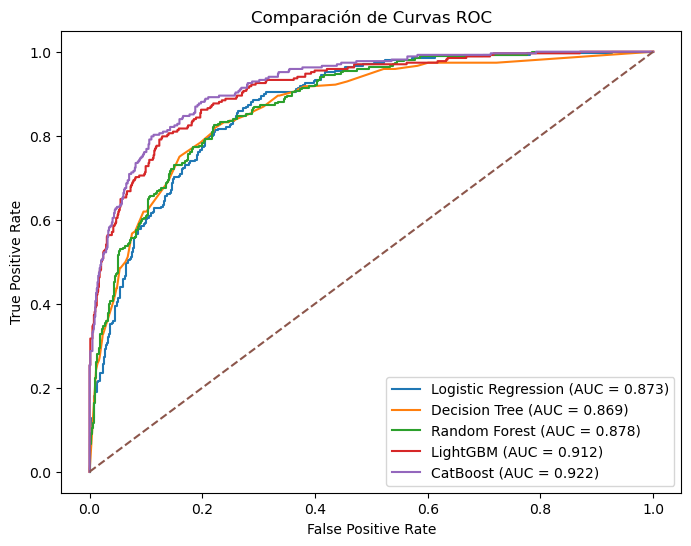

In [82]:
models = {
    "Logistic Regression": (logreg_pipeline, features_valid),
    "Decision Tree": (tree_pipeline, features_valid),
    "Random Forest": (rndfst_pipeline, features_valid),
    "LightGBM": (lgbm_model, lgbm_features_valid),
    "CatBoost": (cat_model, features_valid)
}



def plot_multiple_roc(models_dict, target_valid):
    
    plt.figure(figsize=(8,6))
    
    for name, (model, features_valid) in models_dict.items():
        
        target_proba = model.predict_proba(features_valid)[:,1]
        
        fpr, tpr, _ = roc_curve(target_valid, target_proba)
        auc = roc_auc_score(target_valid, target_proba)
        
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")
    
    plt.plot([0,1], [0,1], linestyle='--')
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Comparación de Curvas ROC')
    plt.legend()
    plt.show()



plot_multiple_roc(models, target_valid)

In [83]:
def results_table(models_dict, target_valid):
    results = []
    for name, (model, features_valid) in models_dict.items():
        valid_prob = model.predict_proba(features_valid)[:,1]
        predictions = model.predict(features_valid)

        auc = roc_auc_score(target_valid, valid_prob)
        acc = accuracy_score(target_valid, predictions)

        results.append({
            'Model': name,
            'AUC-ROC': auc,
            'Accuracy': acc
        })
        
    results_data = pd.DataFrame(results)
    results_data = results_data.sort_values(by='AUC-ROC', ascending=False)

    return results_data

results_table(models, target_valid)

,Model,AUC-ROC,Accuracy
4,CatBoost,0.922225,0.867871
3,LightGBM,0.912068,0.853612
2,Random Forest,0.878117,0.831749
0,Logistic Regression,0.872949,0.765209
1,Decision Tree,0.869008,0.831749


Despues de entrenar y probar modelos hemos obtenido los mejores resultados con nuestro modelo de CatBoost con un AUC de 0.92 y una exactitud de 0.86, así mismo podemos comprobar nuestros resultados observando nuestra gráfica comparativa de curvas ROC. Vemos que nuestro modelo en el 92% de los casos, le da mayor probabilidad de churn a un cliente que realmente churnea que a uno que no churnea. Un resultado sumamente bueno y si sumado a esto vemos que el 86% de los clientes son clasificados correctamente.

### Validación cruzada modelo elegido
Realicemos una validación cruzada para nuestro modelo CatBoost.

In [88]:
cv_scores = cross_val_score(
    CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    eval_metric='AUC',
    random_seed=42,
    verbose=False,
    cat_features=cat_features),
    
    features_train,
    target_train,
    cv=5,
    scoring='roc_auc'
)

print('CV AUC:', cv_scores.mean())

CV AUC: 0.8994748266282866


Tenemos una pequeña diferencia entre el resultado obtenido con los datos de validación y nuestra validación cruzada, sin embargo al ser tan pequeña la diferencia es algo razonable y esperado. Antes de continuar hagamos una prueba de cordura con etiquetas aleatorias para este modelo, así nos aseguramos de que no haya fuga de información.

### Prueba de cordura modelo elegido

In [90]:
target_random = np.random.permutation(target_train)

cat_sanity_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    eval_metric='AUC',
    random_seed=42,
    verbose=False,
    cat_features=cat_features)
cat_sanity_model.fit(features_train, target_random)
sanity_one_prob = cat_sanity_model.predict_proba(features_valid)[:,1]
print('Sanity CatBoost model AUC:', roc_auc_score(target_valid, sanity_one_prob))

Sanity CatBoost model AUC: 0.5188137755102041


Ahora podemos asegurar que nuestro modelo no presenta fuga de información evidente y que los resultados obtenidos hasta ahora son correctos.

### Ajuste de hiperparámetros

In [92]:
#definamos el modelo base
base_cat_model = CatBoostClassifier(
    eval_metric='AUC',
    random_seed=42,
    verbose=False,
    cat_features=cat_features)

In [93]:
#definamos el grid
grid_param = {
    'iterations': [300, 500, 700],
    'learning_rate': [0.01, 0.03, 0.05, 0.07],
    'depth': [4, 5, 6, 7, 8],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'border_count': [32, 64, 128]
}

In [94]:
#Configuremos la busqueda
random_search = RandomizedSearchCV(
    estimator=base_cat_model,
    param_distributions=grid_param,
    n_iter=25,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(features_train, target_train)

print("Best CV AUC:", random_search.best_score_)
print("Best Params:", random_search.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best CV AUC: 0.9078804269025813
Best Params: {'learning_rate': 0.07, 'l2_leaf_reg': 5, 'iterations': 700, 'depth': 5, 'border_count': 128}


### Prueba Final

In [95]:
#Unamos nuestros datos de train y valid para entrenar nuestro modelo
features_train_full = pd.concat([features_train, features_valid])
target_train_full = pd.concat([target_train, target_valid])

In [98]:
#Modelo
cat_final_model = CatBoostClassifier(
    iterations=700,
    learning_rate=0.07,
    depth=5,
    eval_metric='AUC',
    l2_leaf_reg=5,
    border_count=128,
    random_seed=42,
    verbose=False,
    cat_features=cat_features
)


In [99]:
#prueba
cat_final_model.fit(features_train_full, target_train_full)
test_predictions = cat_final_model.predict(features_test)

test_one_prob = cat_final_model.predict_proba(features_test)[:,1]
print('Final Test AUC:', roc_auc_score(target_test, test_one_prob))
print('Final Test Accuracy:', accuracy_score(target_test, test_predictions))

Final Test AUC: 0.9028881459966023
Final Test Accuracy: 0.8578199052132701


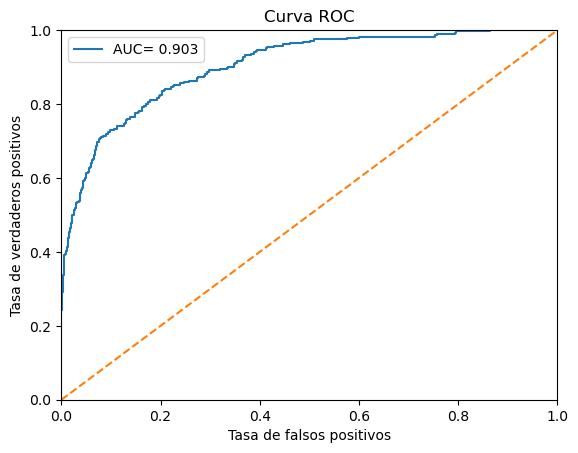

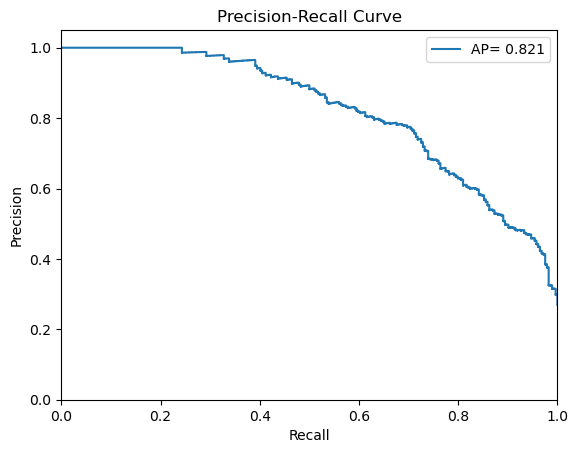

In [100]:
test_prob = cat_final_model.predict_proba(features_test)

plot_roc_curve(target_test, test_prob)
plot_pr_curve(target_test, test_prob)

In [106]:
#Veamos una tabla que muestra los resultados obtenidos, los reales y la probabilidad de abandono
comparison_data = pd.DataFrame({
    "customerID": data.loc[features_test.index, "customerID"],
    "Real": target_test,
    "Predicted": test_predictions,
    "Probability": test_one_prob
})
print(comparison_data)

      customerID  Real  Predicted  Probability
2476  6614-YWYSC     0          0     0.006653
6773  9546-KDTRB     0          0     0.055196
6116  0871-URUWO     1          1     0.874621
3047  5151-HQRDG     0          0     0.105719
4092  6624-JDRDS     0          0     0.260480
...          ...   ...        ...          ...
2208  5197-YPYBZ     0          0     0.018229
4216  4029-HPFVY     0          0     0.455022
4615  8755-IWJHN     0          0     0.141105
3765  5960-WPXQM     1          1     0.799072
6461  4544-RXFMG     0          0     0.069302

[1055 rows x 4 columns]


In [107]:
#Veamos aquellos con mayor probabilidad de abandonar la compañía
comparison_data.sort_values(by="Probability", ascending=False).head(10)

,customerID,Real,Predicted,Probability
1330,1768-ZAIFU,1,1,0.997247
3646,0612-RTZZA,1,1,0.996763
2748,6857-VWJDT,1,1,0.996650
5178,3776-EKTKM,1,1,0.995945
3545,7594-RQHXR,1,1,0.995863
3305,9885-CSMWE,1,1,0.995792
5472,8473-VUVJN,1,1,0.995738
6738,6230-BSUXY,1,1,0.995661
2189,2514-GINMM,1,1,0.995573
6999,0723-DRCLG,1,1,0.995442


### Adicional: Optimización del Threshold
Ahora que hemos obtenido nuestros resultados y encontramos que nuestro modelo ordena con suficiencia los usuarios que abandonas vs los que no, sería prudente realizar una verificación y ajuste del umbral ya que para una empresa es de suma importancia minimizar los falsos negativos, aunque esto implicaría una disminución de la precisión la empresa puede realizar campañas de retención que en general son más economicas que adquirir nuevos clientes y por tanto reduce perdidas.

In [116]:
#Veamos la matríz de confusión actual  
cm = confusion_matrix(target_test, test_predictions)

confusion_data = pd.DataFrame(
    cm,
    index=["Real 0", "Real 1"],
    columns=["Pred 0", "Pred 1"]
)

confusion_data


,Pred 0,Pred 1
Real 0,732,39
Real 1,111,173


In [117]:
#verifiquemos los valores de Recall, Precision y F1
print('Test Recall:', recall_score(target_test, test_predictions))
print('Test Precision:', precision_score(target_test, test_predictions))
print('Test F1:', f1_score(target_test, test_predictions))

Test Recall: 0.6091549295774648
Test Precision: 0.8160377358490566
Test F1: 0.6975806451612904


In [118]:
def evaluate_thresholds(real_target, target_prob):
    
    thresholds = np.linspace(0.1, 0.9, 50)
    results = []
    
    for t in thresholds:
        target_pred = (target_prob >= t).astype(int)
        
        results.append({
            "Threshold": t,
            "Accuracy": accuracy_score(real_target, target_pred),
            "Precision": precision_score(real_target, target_pred),
            "Recall": recall_score(real_target, target_pred),
            "F1": f1_score(real_target, target_pred)
        })
    
    return pd.DataFrame(results)


threshold_results = evaluate_thresholds(target_test, test_one_prob)
threshold_results.sort_values(by="F1", ascending=False).head()


,Threshold,Accuracy,Precision,Recall,F1
19,0.410204,0.863507,0.769231,0.704225,0.735294
20,0.426531,0.864455,0.780876,0.690141,0.732710
18,0.393878,0.856872,0.741818,0.718310,0.729875
21,0.442857,0.862559,0.783673,0.676056,0.725898
17,0.377551,0.851185,0.721254,0.728873,0.725044


In [119]:
best_row = threshold_results.loc[threshold_results["F1"].idxmax()]
best_threshold = best_row["Threshold"]

print("Best threshold:", best_threshold)
print(best_row)


Best threshold: 0.4102040816326531
Threshold    0.410204
Accuracy     0.863507
Precision    0.769231
Recall       0.704225
F1           0.735294
Name: 19, dtype: float64


In [120]:
#Veamos la nueva matríz de confusión si modificamos el umbral
test_pred_best = (test_one_prob >= best_threshold).astype(int)

cm_best = confusion_matrix(target_test, test_pred_best)

confusion_data_best = pd.DataFrame(
    cm_best,
    index=["Real 0", "Real 1"],
    columns=["Pred 0", "Pred 1"]
)

confusion_data_best

,Pred 0,Pred 1
Real 0,711,60
Real 1,84,200


Con este nuevo umbral de clasificación de 0.4102 hemos disminuido los falsos negativos, aunque tambien han aumentado los falsos positivos estos resultados suelen ser utiles economicamente para la empresa ya que minimizan perdidas de clientes y de costos, al ser usualmente más económica realizar una campaña de retención que atraer un nuevo cliente.

## Conclusiones


Se desarrolló un modelo con capacidad real de predecir como quedó demostrado al comparar los resultados con las pruebas de cordura realizadas, para este modelo utilizamos CatBoostClassifier obteniendo un AUC-ROC en prueba final de 0.903. Nuestro modelo además fue evaluado realizando validación cruzada, de esta forma logramos obtener seguridad de que nuestros resultados son razonables y consistentes, al igual que realizamos una prueba de cordura utilizando etiquetas aleatorias con el fin de verificar que no existiera data leakage. Despues de verificada la fiabilidad de nuestros resultados realizamos una busqueda de hiperparámetros con el fin de encontrar la mejor versión de nuestro modelo posible, así encontramos los siguientes valores: 'learning_rate': 0.07, 'l2_leaf_reg': 5, 'iterations': 700, 'depth': 5, 'border_count': 128.

Con nuestro modelo ajustado despues de pruebas con datos de validación, realizamos el entrenamiento de nuestro modelo ajustado con los datos unidos de entrenamiento y validación originales, y evaluamos nuestro modelo con datos de prueba separados desde el inicio de los demás datos. De esta prueba final obtuvimos los resultados: Final Test AUC: 0.9028881459966023 y Final Test Accuracy: 0.8578199052132701, así demostramos un modelo sólido que clasifica correctamente en el 85% de las oportunidades y que ademas en un 90% da mayor probabilidad de abandono a los clientes que ralmente abandonan la empresa.

Finalmente, mediante ajuste de umbral logramos aumentar la detección de clientes en riesgo de abandono del 60.9% al 70.4%, lo que permite reducir la perdida de clientes, esto por supuesto dependerá del costo por campaña de retención comparado con el costo de adquisición de un nuevo cliente para la empresa.

### Breve resumen:
- Modelo ganador: CatBoost
- AUC final: 0.903
- Recall mejorado a 70%
- Modelo estable, sin data leakage
- Listo para implementación real